Summary:


The columns in the dataset:
1. Columns ID and Case Number helps in uniquely identifing the crime record.
2. Columns like Date and Year shows when this crime happened.
3. X/Y Coordinate, Latitude/Longitude, Location explains where exactly did the crime happened.
4. Beat, District, Ward, Community Area helps in identifying the areas of Chicago this crime happened.

The data shows that, we have 22 columns and 697017 records, including ID, Case Number, Block, Primary Type, Description, etc. Data has some Missing values in some columns like Longitude, Location Latitude, Y.Coordinate, X.Coordinate  etc. For simplicity I removed the null values. 
Approach:


*   Data Analysis/Preprocessing
*   Prediction





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn import model_selection, svm
from sklearn.utils.class_weight import compute_class_weight
#from sklearn.metrics import accuracy_score,classification_report
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,classification_report
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix

matplotlib.rcParams['figure.figsize'] =(15, 7)

### Data Preprocessing/Analysis

In [ ]:
#Read the dataset
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('/Chicago_Crime_2013_2015.csv',encoding='latin-1')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697017 entries, 0 to 697016
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ï..ID                 697017 non-null  int64  
 1   Case.Number           697017 non-null  object 
 2   Date                  697017 non-null  object 
 3   Block                 697017 non-null  object 
 4   IUCR                  697017 non-null  object 
 5   Primary.Type          697017 non-null  object 
 6   Description           697017 non-null  object 
 7   Location.Description  696771 non-null  object 
 8   Arrest                697017 non-null  bool   
 9   Domestic              697017 non-null  bool   
 10  Beat                  697017 non-null  int64  
 11  District              690803 non-null  float64
 12  Ward                  697011 non-null  float64
 13  Community.Area        697003 non-null  float64
 14  FBI.Code              697017 non-null  object 
 15  

In [ ]:
df.head()

,ï..ID,Case.Number,Date,Block,IUCR,Primary.Type,Description,Location.Description,Arrest,Domestic,...,Ward,Community.Area,FBI.Code,X.Coordinate,Y.Coordinate,Year,Updated.On,Latitude,Longitude,Location
0,10124853,HY313560,06/23/2015 11:50:00 PM,024XX S KEDVALE AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,...,22.0,30.0,06,1149248.0,1887712.0,2015,06/30/2015 12:40:42 PM,41.847805,-87.727747,"(41.84780493, -87.727747291)"
1,10124960,HY313663,06/23/2015 11:45:00 PM,051XX S WENTWORTH AVE,0454,BATTERY,AGG PO HANDS NO/MIN INJURY,POLICE FACILITY/VEH PARKING LOT,True,False,...,3.0,37.0,08B,1175865.0,1871146.0,2015,06/30/2015 12:40:42 PM,41.801790,-87.630560,"(41.801789811, -87.630559815)"
2,10124917,HY313603,06/23/2015 11:42:00 PM,049XX W RACE AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,APARTMENT,True,False,...,37.0,25.0,15,1143419.0,1903252.0,2015,06/30/2015 12:40:42 PM,41.890559,-87.748752,"(41.890559483, -87.748751767)"
3,10124869,HY313604,06/23/2015 11:42:00 PM,049XX W RACE AVE,2027,NARCOTICS,POSS: CRACK,APARTMENT,True,False,...,37.0,25.0,18,1143419.0,1903252.0,2015,06/30/2015 12:40:42 PM,41.890559,-87.748752,"(41.890559483, -87.748751767)"
4,10124873,HY313566,06/23/2015 11:40:00 PM,070XX S STATE ST,0496,BATTERY,AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST,SIDEWALK,False,True,...,6.0,69.0,04B,1177469.0,1858544.0,2015,06/30/2015 12:40:42 PM,41.767173,-87.625058,"(41.767172506, -87.625058064)"


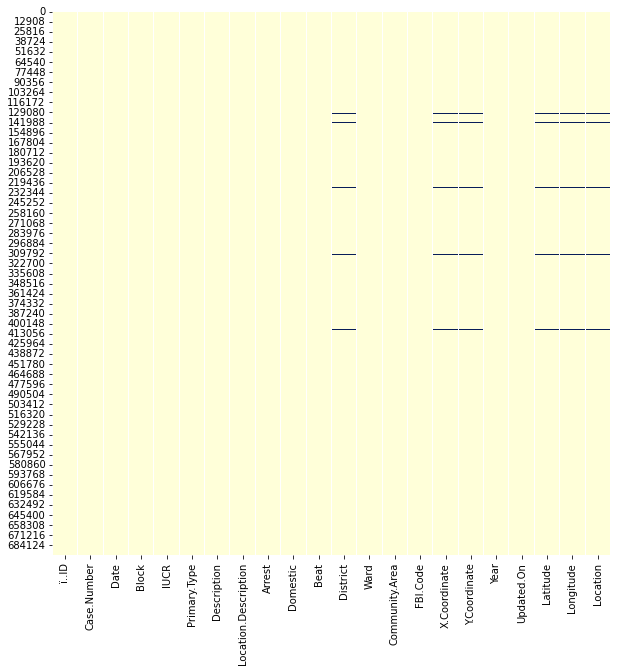

In [ ]:
##Missing value visualization
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cbar=False,cmap='YlGnBu')
plt.show()

In [ ]:
df.isnull().sum()

ï..ID                      0
Case.Number                0
Date                       0
Block                      0
IUCR                       0
Primary.Type               0
Description                0
Location.Description     246
Arrest                     0
Domestic                   0
Beat                       0
District                6214
Ward                       6
Community.Area            14
FBI.Code                   0
X.Coordinate            6206
Y.Coordinate            6206
Year                       0
Updated.On               110
Latitude                6206
Longitude               6206
Location                6206
dtype: int64

In [ ]:
##Print column names
df.columns

Index(['ï..ID', 'Case.Number', 'Date', 'Block', 'IUCR', 'Primary.Type',
       'Description', 'Location.Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community.Area', 'FBI.Code', 'X.Coordinate',
       'Y.Coordinate', 'Year', 'Updated.On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697017 entries, 0 to 697016
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ï..ID                 697017 non-null  int64  
 1   Case.Number           697017 non-null  object 
 2   Date                  697017 non-null  object 
 3   Block                 697017 non-null  object 
 4   IUCR                  697017 non-null  object 
 5   Primary.Type          697017 non-null  object 
 6   Description           697017 non-null  object 
 7   Location.Description  696771 non-null  object 
 8   Arrest                697017 non-null  bool   
 9   Domestic              697017 non-null  bool   
 10  Beat                  697017 non-null  int64  
 11  District              690803 non-null  float64
 12  Ward                  697011 non-null  float64
 13  Community.Area        697003 non-null  float64
 14  FBI.Code              697017 non-null  object 
 15  

In [ ]:
df.shape

(697017, 22)

In [ ]:
##Drop the null values
df = df.dropna()
##drop the unused columns
df = df.drop(columns=['ï..ID', 'Case.Number', 'Block', 'IUCR','Domestic', 'Beat', 'District', 'Ward','X.Coordinate', 'Y.Coordinate','Updated.On', 'FBI.Code'], axis = 1)

In [ ]:
pd.value_counts(df['Location.Description'])[:10]

STREET                            157134
RESIDENCE                         108046
APARTMENT                          87878
SIDEWALK                           79175
OTHER                              26189
PARKING LOT/GARAGE(NON.RESID.)     19226
ALLEY                              15223
SCHOOL, PUBLIC, BUILDING           14353
RESIDENTIAL YARD (FRONT/BACK)      14026
SMALL RETAIL STORE                 13412
Name: Location.Description, dtype: int64

In [ ]:
pd.value_counts(df['Primary.Type'])[:10]

THEFT                  156279
BATTERY                125206
NARCOTICS               73096
CRIMINAL DAMAGE         70634
OTHER OFFENSE           42855
ASSAULT                 42479
BURGLARY                37441
DECEPTIVE PRACTICE      33118
MOTOR VEHICLE THEFT     26859
ROBBERY                 25227
Name: Primary.Type, dtype: int64

In [ ]:
theft_type = df[df['Primary.Type'] == 'THEFT']


In [ ]:
##Top 10 crimes
top_crimes = df['Primary.Type'].value_counts().iloc[:10].index
top_crimes

Index(['THEFT', 'BATTERY', 'NARCOTICS', 'CRIMINAL DAMAGE', 'OTHER OFFENSE',
       'ASSAULT', 'BURGLARY', 'DECEPTIVE PRACTICE', 'MOTOR VEHICLE THEFT',
       'ROBBERY'],
      dtype='object')

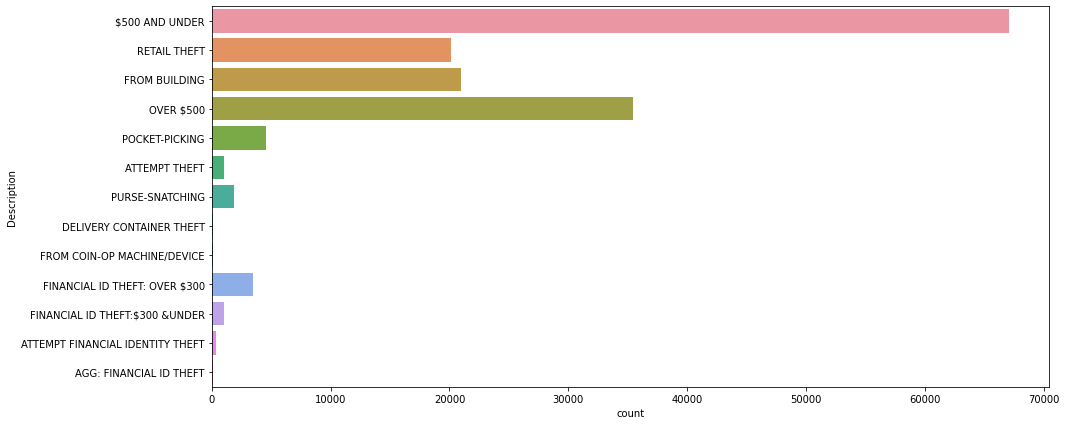

In [ ]:
plt.figure(figsize = (15, 7))
sns.countplot(y = theft_type['Description'])

In [ ]:
## Convert date to date format
df['Date'] = pd.to_datetime(df.Date,format = '%m/%d/%Y %I:%M:%S %p')

In [ ]:
df['datetime']=pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690463 entries, 0 to 697016
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date                  690463 non-null  datetime64[ns]
 1   Primary.Type          690463 non-null  object        
 2   Description           690463 non-null  object        
 3   Location.Description  690463 non-null  object        
 4   Arrest                690463 non-null  bool          
 5   Community.Area        690463 non-null  float64       
 6   Year                  690463 non-null  int64         
 7   Latitude              690463 non-null  float64       
 8   Longitude             690463 non-null  float64       
 9   Location              690463 non-null  object        
 10  datetime              690463 non-null  datetime64[ns]
 11  week_day              690463 non-null  int64         
 12  date                  690463 non-null  int64         
 13 

In [ ]:
df.set_index('Date',inplace=True)

In [ ]:
##per year crime count
cr_yr = df.resample('Y').size()
cr_yr

Date
2013-12-31    304208
2014-12-31    269830
2015-12-31    116425
Freq: A-DEC, dtype: int64

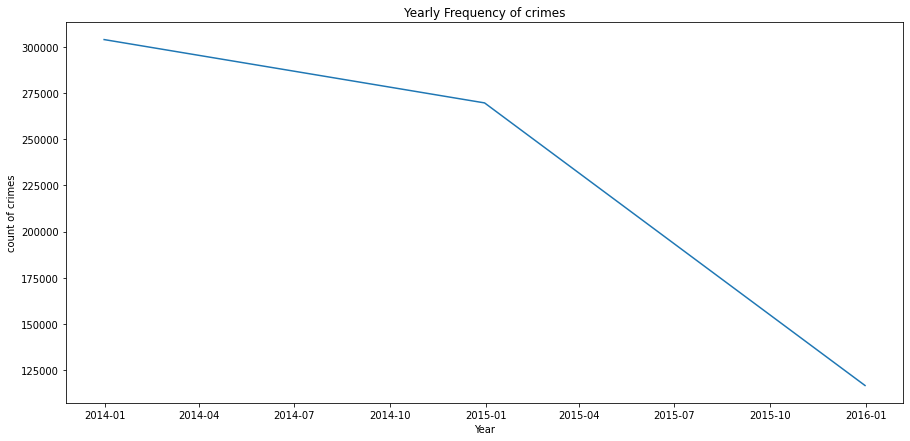

In [ ]:
##Yearly crime distribution visualization
plt.plot(cr_yr)
plt.title('Yearly Frequency of crimes')
plt.xlabel('Year')
plt.ylabel('count of crimes')
plt.show()

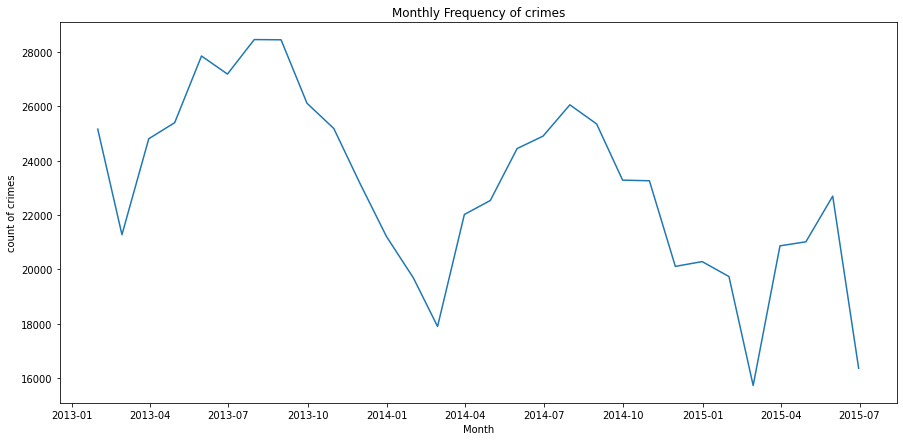

In [ ]:
## Monthly crime distribution visualization
plt.plot(df.resample('M').size())
plt.title('Monthly Frequency of crimes')
plt.xlabel('Month')
plt.ylabel('count of crimes')
plt.show()

### Prediction / Model Building

In [95]:
df=pd.read_csv('/Chicago_Crime_2013_2015.csv',encoding='latin-1')
df.dropna(inplace=True)

In [96]:
df['Community.Area'].unique()

array([30., 37., 25., 69., 43., 28., 44., 71., 24., 67., 26., 40., 66.,
       41., 49., 42.,  6.,  1., 27., 29., 19., 31., 13., 23., 38., 73.,
       39., 53., 61., 59., 58., 56., 68., 17.,  2., 72.,  7., 20., 70.,
       46., 65., 10., 32.,  4., 35.,  8., 16., 22., 48., 34., 11., 14.,
        3., 75., 33., 45., 15., 74., 21., 50., 54., 76., 52., 77., 51.,
       60., 12., 63., 62.,  5., 18., 57., 36., 55., 64., 47.,  9.])

In [97]:
date_time = pd.to_datetime(df.Date)
df.set_index(date_time,inplace=True)

In [98]:
# resample primary_type count by weekly resolution
community_1=df.loc[df['Community.Area']==df['Community.Area'].unique().tolist()[0]].resample('W').apply({'Primary.Type': 'count'})

In [99]:
lag=1
X=community_1.shift(lag).dropna()
y=community_1[lag:]

In [100]:
#train-test-split
X_train=X[X.index.year.isin([2013, 2014])]
X_test=X[X.index.year.isin([2015])]
y_train=y[y.index.year.isin([2013, 2014])]
y_test=y[y.index.year.isin([2015])]

In [101]:
X_scaler=StandardScaler().fit(X_train)
y_scaler=StandardScaler().fit(y_train)

X_train_scaled= X_scaler.transform(X_train)
y_train_scaled= y_scaler.transform(y_train)
X_test_scaled= X_scaler.transform(X_test)
y_test_scaled= y_scaler.transform(y_test)

[19:45:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


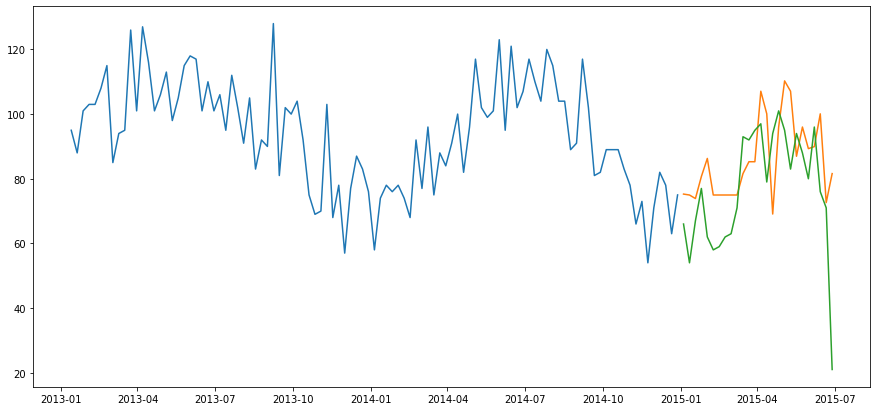

In [102]:
# fit the model
xgb_predict_crime = xgb.XGBRegressor()
xgb_predict_crime.fit(X_train_scaled, y_train_scaled)

# get predictions 
predictions_scaled = xgb_predict_crime.predict(X_test_scaled)
predictions=y_scaler.inverse_transform(predictions_scaled[:,np.newaxis])
# plot predictions
plt.plot(y_train.index, y_train['Primary.Type'].values)
plt.plot(y_test.index, predictions)
plt.plot(y_test.index,y_test['Primary.Type'].values)

In [104]:
#predictions for all community areas
import joblib as joblib
for i,area in enumerate(df['Community.Area'].unique()):
  # resample primary_type count by weekly resolution
  community_1=df.loc[df['Community.Area']==df['Community.Area'].unique().tolist()[i]].resample('W').apply({'Primary.Type': 'count'})

  lag=1
  X=community_1.shift(lag).dropna()
  y=community_1[lag:]
  X_save='X_community_'+str(area)+'.csv'
  y_save='y_community_'+str(area)+'.csv'
  X.to_csv(X_save,index=False)
  y.to_csv(y_save,index=False)

  #train-test-split
  X_train=X[X.index.year.isin([2013, 2014])]
  X_test=X[X.index.year.isin([2015])]
  y_train=y[y.index.year.isin([2013, 2014])]
  y_test=y[y.index.year.isin([2015])]

  X_scaler=StandardScaler().fit(X_train)
  y_scaler=StandardScaler().fit(y_train)

  X_train_scaled= X_scaler.transform(X_train)
  y_train_scaled= y_scaler.transform(y_train)
  X_test_scaled= X_scaler.transform(X_test)
  y_test_scaled= y_scaler.transform(y_test)

  # fit the model
  xgb_predict_crime = xgb.XGBRegressor()
  xgb_predict_crime.fit(X_train_scaled, y_train_scaled)
  filename = '/xgb_'+str(area)+'.joblib.pkl'
  _ = joblib.dump(xgb_predict_crime, filename, compress=9)


  # get predictions 
  predictions_scaled = xgb_predict_crime.predict(X_test_scaled)
  predictions=y_scaler.inverse_transform(predictions_scaled[:,np.newaxis])

  predicted_df=y_test
  predicted_df['predicted']=predictions
  pred_filen='predictions'+str(area)+'.csv'
  predicted_df.to_csv(pred_filen)
 

[19:46:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:46:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:46:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:46:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:46:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:46:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:46:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:46:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

## Additional Notes
Here I have immplemented the comunitywise prediction and getting the csv file of prediction for each comunity seperately. Finally we can merge the dataframes in one 
dataframe in a filename March_2015_Rankings_YADAV_MANJU, that part is missing.
Also instead of univariate time-series I could have used multivariate time series, which I could not implement due to time constraint.